## Prediction of Survival of Promoted Teams to the Premier League in the First Season using Logistic Regression

# The Problem
In English football pyramid, three teams are promoted from the second tier of the pyramid, The Championship, to the top, Premier League. These three teams take place of the worst three teams which are relegated. But soon after their promotion, these three teams are considered to be favorites to be relegated at the end of the season.<br /> Therefore it is of interest that we can find factors that can suggest whether a team promoted can survive the first season or not.

# The Solution
Using Logistical Regression Analysis applied to a dataset containing key factors with regards to every team promoted in each season of the league, we would like to create a model which can predict the survival of a promoted team. Using such a model, we could hopefully predict the survival or relegation of promoted teams in the future.

# 1. Importing Packages

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mtp
from sklearn.linear_model import LogisticRegression

# 2. Exploring the Dataset

In [2]:
#Reading the Dataset
ds = pd.read_csv(r'Promoted_Teams.csv')
ds.head()

,Season,Name,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc,Survival
0,92/93,Ipswich Town,1,0.75,52,50,55,1
1,92/93,Middlesbrough,2,3.18,44,54,75,0
2,92/93,Blackburn,3,11.84,71,68,46,1
3,93/94,Newcastle,1,6.60,77,82,41,1
4,93/94,West Ham,2,2.01,52,47,58,1


The dataset contains 8 Columns -  
1. Season - The Season the team got promoted. The dataset is spans seasons from 1992/1993 to the 2022/2023 with each season having three entries, except for the 1995/96 season, which only had two teams promoted. This leads to a total of 92 rows of entries.  
2. Name - The Name of the team that got Promoted.  
3. Prom - The way the team got promotion. This column is categorical, divided into 3 columns -  
    1. The team came first in the Championship and got automatic promotion, represented as '1'.
    2. The team came second in the Championship and got automatic promotion, represented as '2'.
    3. The team came somewhere between 3rd and 6th, and qualified by winning the Playoff tournament between the 4 teams. Represented as '3'.
4. Money_Spent - Money Spent (in Millions) by the team that season.  
5. Pts - Points accumilated by the team in that season after they got promoted.  
6. Gl_Scored - No. of Goals Scored by the team that season.  
7. Gl_Conc - No. of Goals Conceded by the team that season.
8. Survival - Categorical variable representing whether the team survived, or got relegated that season. Survival represented as 1, while relegation represented as 0.

#   2.1 Applying Graphical Analysis to the Dataset

<p>In all graphs presented below, teams that survived their first season in the league are represented in blue, while the teams that were relegated are represented in brown. This is done to help us easily visualise differences and some salient points that might be missed otherwise.</p>

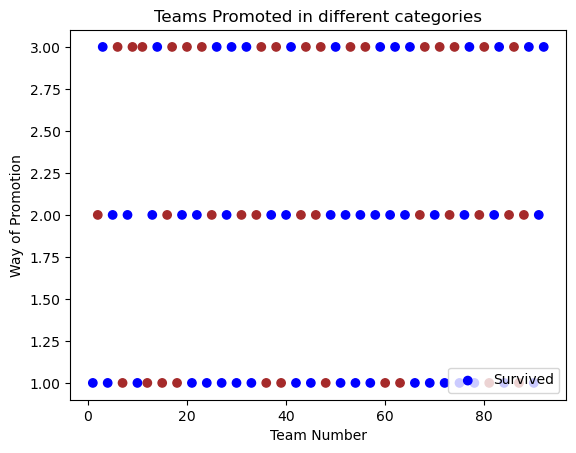

In [3]:
x = range(1, 93)
colors = {1 : 'Blue', 0 : 'Brown'}
mtp.scatter(x = x, y = ds.Prom, c = ds.Survival.map(colors), alpha = 1) 
mtp.title("Teams Promoted in different categories")
mtp.xlabel("Team Number")
mtp.ylabel("Way of Promotion")
mtp.legend(['Survived', 'Relegated'], loc = 'best')
mtp.show()

By plotting the different ways the teams get promoted, we find that teams that were directly promoted were more likely survive than teams that were promoted via the playoffs in general. 

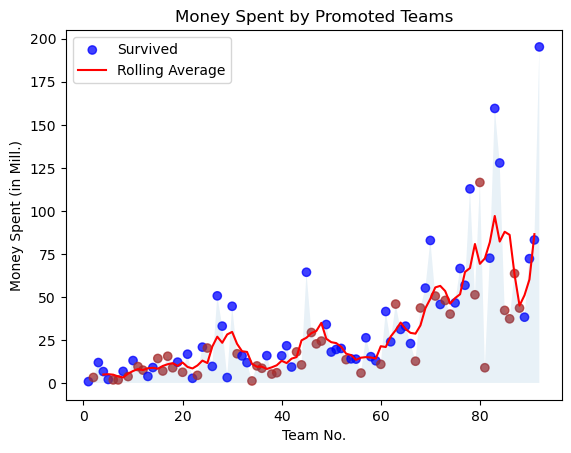

In [4]:
#Money Spent
mtp.scatter(x, ds.Money_Spent, c = ds.Survival.map(colors), alpha = 0.75, label = 'Survived')
mtp.fill_between(x, ds.Money_Spent, alpha = 0.1)
rm = ds.Money_Spent.rolling(5).mean()
mtp.plot(rm, c = 'red', label = 'Rolling Average')
mtp.title("Money Spent by Promoted Teams")
mtp.xlabel("Team No.")
mtp.ylabel("Money Spent (in Mill.)")
mtp.legend()
mtp.show()

<p>The graph for Money Spent shows that there is a trend in the amount spent. More money is being spent by the teams as seasons go. This creates a problem as this would give more weight to the values representing the later seasons, skewing the Model. </p>
<p>This can also be seen in the following graph where there are more extreme values which can affect the model, while showing a bit of overlap.</p>

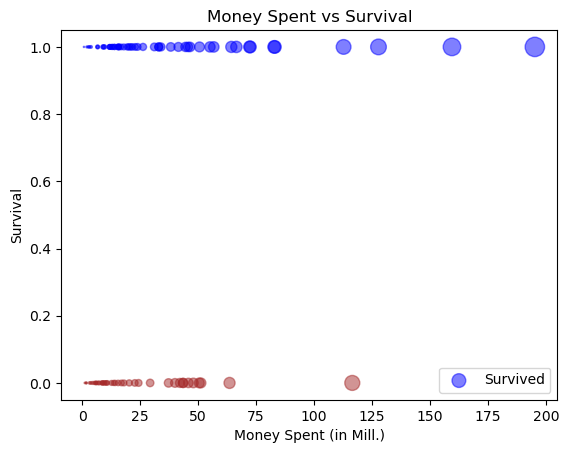

In [5]:
mtp.scatter(ds.Money_Spent, ds.Survival, c = ds.Survival.map(colors), s = ds.Money_Spent, alpha = 0.5, label = 'Survived')
mtp.xlabel("Money Spent (in Mill.)")
mtp.ylabel("Survival")
mtp.title("Money Spent vs Survival")
mtp.legend()
mtp.show()

# 2.1.1 Improving on Money_Spent

<p>To make sure the model is not effected by the trend present in the Money_Spent variable, we will take use of the Total_Exp file.</p>
<p>Total_Exp is a file that contains the total amount of money spent by all the teams present in the league. By dividing the amount of Money spent by the teams to the total money spent that season, we would create a new variable that would be without the trend of increasing spending and give us the money spent with relation to the total league spend.</p>

In [6]:
mds = pd.read_csv(r'Total_Exp.csv')
mds.head()

,Season,Total_Exp
0,92/93,63.57
1,93/94,87.75
2,94/95,139.29
3,95/96,205.69
4,96/97,187.35


<function matplotlib.pyplot.show(close=None, block=None)>

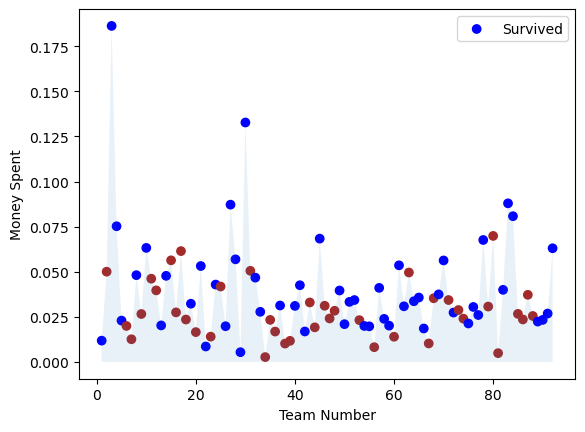

In [7]:
Exp_Factor = []
for a in range(0,92):
    for b in range(0,31):
        if ds.Season[a] == mds.Season[b]:
            Exp_Factor.append(ds.Money_Spent[a] / mds.Total_Exp[b])
mtp.scatter(x, Exp_Factor, c = ds.Survival.map(colors), label = 'Survived')
mtp.fill_between(x, Exp_Factor, alpha = 0.1)
mtp.xlabel("Team Number")
mtp.ylabel("Money Spent")
mtp.legend()
mtp.show

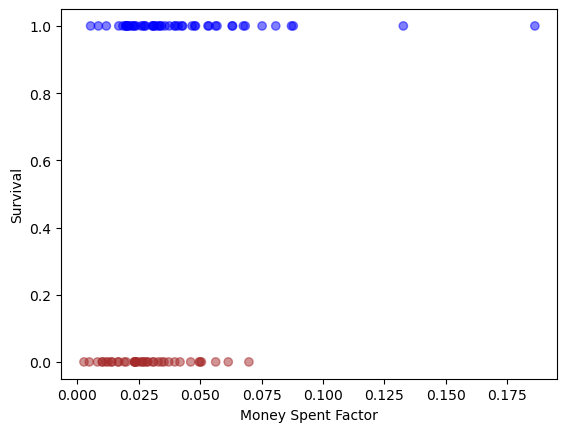

In [8]:
mtp.scatter(Exp_Factor, ds.Survival, c = ds.Survival.map(colors), alpha = 0.5)
mtp.xlabel("Money Spent Factor")
mtp.ylabel("Survival")
mtp.show()

<p> The 2 graphs shown above show that the new variable Exp_Factor is a better representation, and suits the model better as it has no trends. Therefore, we can confidently remove Money_Spent and replace it with Exp_Factor. </p>


In [9]:
ds.Money_Spent = Exp_Factor
ds.head()

,Season,Name,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc,Survival
0,92/93,Ipswich Town,1,0.011798,52,50,55,1
1,92/93,Middlesbrough,2,0.050024,44,54,75,0
2,92/93,Blackburn,3,0.186251,71,68,46,1
3,93/94,Newcastle,1,0.075214,77,82,41,1
4,93/94,West Ham,2,0.022906,52,47,58,1


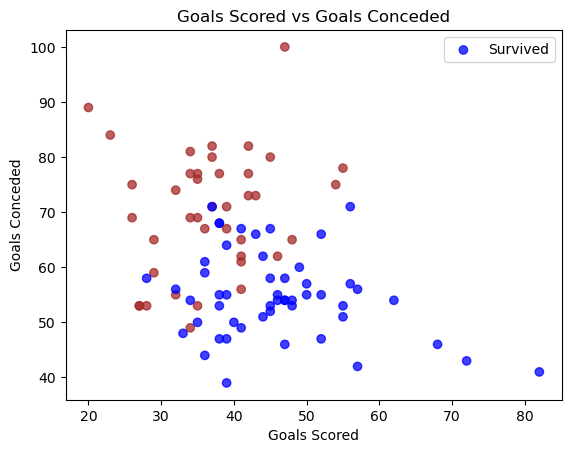

In [10]:
# Goal Scored and Goal Conceded
mtp.scatter(ds.Gl_Scored, ds.Gl_Conc, c = ds.Survival.map(colors), alpha = 0.75, label = 'Survived')
mtp.xlabel("Goals Scored")
mtp.ylabel("Goals Conceded")
mtp.title("Goals Scored vs Goals Conceded")
mtp.legend()
mtp.show()

<p> The graph between Goals Scored and Goals Conceded confirms our intial ideas. </p>
<p> Scoring more goals and conceding less do play a part in the survival. While these graphs may look pointless as the points they make sound rudimentary, they do provide a proof to the points. Plus we get some salients that we might miss otherwise. </p>

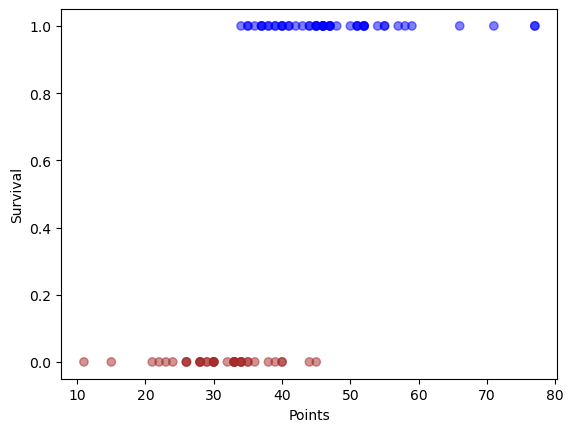

In [11]:
#Pts vs Survival
mtp.scatter(ds.Pts, ds.Survival, c = ds.Survival.map(colors), alpha = 0.5)
mtp.xlabel("Points")
mtp.ylabel("Survival")
mtp.show()

# 3. Finding relation between Concerned Variables

In [12]:
new_ds = ds.drop(columns = ['Season', 'Name '])
new_ds.head()

,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc,Survival
0,1,0.011798,52,50,55,1
1,2,0.050024,44,54,75,0
2,3,0.186251,71,68,46,1
3,1,0.075214,77,82,41,1
4,2,0.022906,52,47,58,1


In [45]:
cor_ds = new_ds.corr()
cor_ds.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 3)


,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc,Survival
Prom,1.000,-0.055,-0.162,-0.073,0.223,-0.160
Money_Spent,-0.055,1.000,0.395,0.302,-0.258,0.268
Pts,-0.162,0.395,1.000,0.805,-0.719,0.694
Gl_Scored,-0.073,0.302,0.805,1.000,-0.326,0.445
Gl_Conc,0.223,-0.258,-0.719,-0.326,1.000,-0.630
Survival,-0.160,0.268,0.694,0.445,-0.630,1.000


Some interesting things that the Correlation Matrix shows that - 
1. Points are more affected by the goals scored, whereas Survival of a team is more affected by goals conceded.  
2. Goals Scored and Goals Conceded are not highly related, meaning we can use both, rather than combining them in a single variable, such as Goal Difference.  
3. Money_Spent is not as big of a factor as we previously thought. 

In [14]:
cor_ds.loc[['Gl_Scored'],['Gl_Conc']]

,Gl_Conc
Gl_Scored,-0.326056


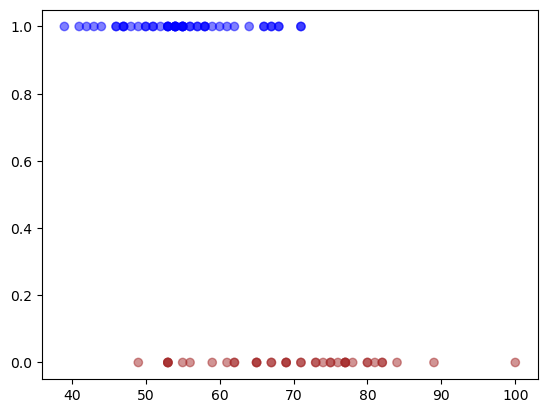

In [15]:
mtp.scatter(ds.Gl_Conc, ds.Survival, c = ds.Survival.map(colors), alpha = 0.5)
mtp.show()

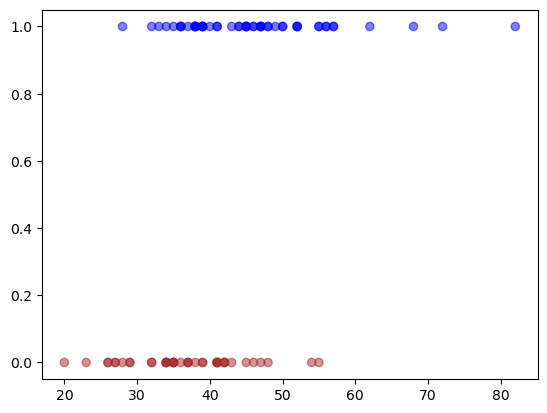

In [16]:
mtp.scatter(ds.Gl_Scored, ds.Survival, c = ds.Survival.map(colors), alpha = 0.5)
mtp.show()

# 4. Splitting the Dataset for Training and Testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
dep = ds.drop(columns = ['Name ', 'Season', 'Survival'] )
dep.head()

,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc
0,1,0.011798,52,50,55
1,2,0.050024,44,54,75
2,3,0.186251,71,68,46
3,1,0.075214,77,82,41
4,2,0.022906,52,47,58


In [19]:
Indep = ds.Survival
Indep.head()

0    1
1    0
2    1
3    1
4    1
Name: Survival, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(dep, Indep, test_size = 0.35, random_state = 92)

In [21]:
x_train.head()

,Prom,Money_Spent,Pts,Gl_Scored,Gl_Conc
61,3,0.030837,46,45,53
26,1,0.087171,44,36,44
40,3,0.042513,55,52,55
68,1,0.037440,42,45,67
89,1,0.023300,52,55,53


In [22]:
y_train.head()

61    1
26    1
40    1
68    1
89    1
Name: Survival, dtype: int64

# 5. Fitting the Logistic Regression Model

In [23]:
lr = LogisticRegression(random_state = 79).fit(x_train, y_train)
lr.predict(x_train)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [46]:
print("Score for Training Set = ",lr.score(x_train, y_train))
print("Score for the Test Set = ", lr.score(x_test, y_test))

Score for Training Set =  0.8813559322033898
Score for the Test Set =  0.8484848484848485


In [41]:
print("Intercept = ", lr.intercept_)
print("Coeefficients = ", lr.coef_)

Intercept =  [-10.47931182]
Coeefficients =  [[ 0.42719085  0.02709408  0.41353727 -0.0053246  -0.08346386]]


# 6. Standardizing the Data to create a Second Model

<p> While we get a decent model, we would like to find a way to make it better. One way that we can try is to standardized the dataset. One of the reason to do this is to get a uniform scale for all the data, as Exp_Factor is between 0 to 1, while the rest of the factors are between 20 to 100. So by standerdizing the data, we can hopefully get a better model with data more standardized and within scale of each other. </p>

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
sc_dep = dep.drop(columns = ['Prom'])
scaler.fit(sc_dep)
sc_dep = scaler.fit_transform(sc_dep)
sc_dep = pd.DataFrame(sc_dep.reshape(92, 4))
sc_dep['Prom'] = dep['Prom'].to_numpy()
sc_dep = sc_dep.rename(str, axis = "columns")
sc_dep.head()

,0,1,2,3,Prom
0,-0.931425,0.994087,0.788008,-0.542918,1
1,0.517074,0.320378,1.176211,1.127599,2
2,5.679214,2.594146,2.534919,-1.294651,3
3,1.471613,3.099428,3.893627,-1.712280,1
4,-0.510506,0.994087,0.496857,-0.292340,2


In [29]:
x2_train, x2_test, y2_train, y2_test = train_test_split(sc_dep, Indep, test_size = 0.35, random_state = 92)

In [30]:
lr2 = LogisticRegression(random_state=79).fit(x2_train, y2_train)
lr2.predict(x2_train)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [47]:
print("Score for Training set = ", lr2.score(x2_train, y2_train))
print("Score for Test Set = ", lr2.score(x2_test, y2_test))

Score for Training set =  0.8983050847457628
Score for Test Set =  0.8484848484848485


<p> The Standardized data gives a model that is slightly better than the original, but there are no major changes, so both models so equal benefits.</p>

In [42]:
print("Intercept = ", lr2.intercept_)
print("Coefficeints = ", lr2.coef_)

Intercept =  [0.81098053]
Coefficeints =  [[ 0.40260259  1.82619     0.52439591 -1.11766912  0.08056285]]
